<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Introduction to Deep Learning </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[DSAIS]</a> MSc in Data Science & Artificial Intelligence Strategy <br/>
         Paris | © Saeed VARASTEH
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#fff4e3;">
    <img src="images/homework.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#db9425">
        <h4 style="padding-top:25px;"> HOMEWORK 04 </h4>
    </span>
</div>

### Homework 04 - In-Class Competition -  Activity Recognition Task

<img src="./images/Act.png" style="width:50%" />

You've seen the power of transfer learning in building new models; let's try it again. You are going to build a model to predict what a person is doing from a photo.

__Dataset summary:__

The dataset we are using contains about 12k+ labeled images. Each image has only one human activity category. The dataset features 15 different classes of human activities, namely: - 'calling', ’clapping’, ’cycling’, ’dancing’, ‘drinking’, ‘eating’, ‘fighting’, ‘hugging’, ‘laughing’, ‘listening_to_music’, ‘running’, ‘sitting’, ‘sleeping’, texting’, and ‘using_laptop’.


__Objective:__

Your task is to build an image classification model using PyTorch pretrained models that classifies which class of activity a human is performing.

Here are the steps you need to follow:

__Step 1: Preparing Data__

Follow the steps below to create the PyTorch dataset.

__Step 2: PyTorch DataLoaders__

Using the created datasets, build training and validation DataLoaders.

__Step 3: Building the Model__

Create your model with the help of one of PyTorch's pretrained models. e.g. `resnet50`.

__Step 4: Training and Evaluation__

Train your model using the train dataset and validate it on the validation dataset.

__Step 5: Predictions__

Time to put your trained model to the test. This one's on me!

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

np.random.seed(72)
torch.manual_seed(72)

---

<div class="alert-warning">
Once you know that you have prepared the data as I asked, and that you have a a working model and code, you can switch to Kaggle or Colab to train the model on GPUs.
</div>

In [2]:
device = "cuda" if torch.cuda.is_available() else "mps"
device

'mps'

---

### Data Preparation

Let's see what we have!

`train_all` a directory contains 12,600 images!

`train_labels.csv` a csv files contains a list of image names and their corresponding labels..

In [3]:
train_files = "./data/Activities/train_all/"
train_df = pd.read_csv('./data/Activities/train_labels.csv')
print(train_df.shape)
train_df.head()

(12600, 2)


,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In order for us to be able to use TorchVision ImageFolder for datasets (which is the most convenient way to handle image datasets), we need to create a directory for each class of images and then move each image into its corresponding directory. 

Of course we do not want to do this manually!

</br>
<div class="alert-info">
If you do not know how, ask ChatGPT! to write some code to do this for you. (yes! this is the first time I am asking you to use it, and I know you have been using it before!)
</div>

After this step, you should have a directory called __train__, where inside we have 15 directories named based on each class of activity, and the corresponding images are stored inside.

In [4]:
# # your code

# import os
# root_path = "./data/Activities"
# # # create the folders by the unique value of df['label]
# # for label in train_df['label'].unique():
# #     os.makedirs(f"{root_path}/{label}", exist_ok=True)

# # 遍历"./data/Activities/train_all/"文件夹下的所有文件，读取文件名可以在df['filename']中找到，然后把他移动到对应的文件夹中

# import shutil
# for i in range(train_df.shape[0]):
#     label = train_df['label'][i]
#     filename = train_df['filename'][i]
#     shutil.move(f"{root_path}/train_all/{filename}", f"{root_path}/{label}/{filename}")

Let's see if you got it right:

In [5]:
from PIL import Image
from IPython.display import display

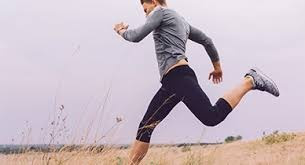

In [6]:
img = Image.open('./data/Activities/train/running/Image_614.jpg')
display(img)

#### Transformations

Bring the Torchvision libraries here.

In [7]:
# your code
from torchvision import transforms
from torchvision import datasets
from torchvision import models

Create a TorchVision transformation consisting of (at least) these four operations. 

- Resize the image to 256. 
- CenterCrop image to 224. The size needed for __restnet50__ model.
- Convert to tensors.
- Normalize with: [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
    
named it __image_transform__.

<span style="color:crimson">Note:</span> If you want to add other transformations, you should create two transformations, one for train and one for validation/test. 

In [8]:
# your code
train_transform = transforms.Compose([
    transforms.Resize(256), # 缩放
    
    # transforms.RandomResizedCrop(224), # 随机获取224*224的图片矩阵
    
    transforms.CenterCrop(224), # 224 * 224 the size needed bu the model I am going to use
    
    # transforms.ColorJitter(),
    # transforms.RandomRotation(degrees=15),
    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # **
])

### Dataset

Now create a dataset named __train_dataset__ using TorchVIsion ImageFolder for your training data.

In [9]:
# your code
train_dataset = datasets.ImageFolder(root="./data/Activities/train", transform=train_transform)

Check:

In [10]:
len(train_dataset)

12600

In [11]:
categories = train_dataset.class_to_idx
categories

{'calling': 0,
 'clapping': 1,
 'cycling': 2,
 'dancing': 3,
 'drinking': 4,
 'eating': 5,
 'fighting': 6,
 'hugging': 7,
 'laughing': 8,
 'listening_to_music': 9,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'texting': 13,
 'using_laptop': 14}

### Train/Validation Split

In [12]:
train_dataset, val_dataset = random_split(train_dataset, [11000, 1600])

len(train_dataset), len(val_dataset)

(11000, 1600)

### DataLoaders

Using the created datasets, build training and validation DataLoaders.

In [13]:
# your code
train_loader = DataLoader(dataset=train_dataset, batch_size=128)
val_loader = DataLoader(dataset=val_dataset, batch_size=128)

In [14]:
len(train_loader), len(val_loader)

(86, 13)

Let's check the input, output dimensions:

In [15]:
img, label = next(iter(val_loader))
img.shape, label.shape

(torch.Size([128, 3, 224, 224]), torch.Size([128]))

### Building a Model

Based on what I told you about how we build models in transfer learning (you can also check the corresponding code file), build a classification model using `resnet50` to classify our images.

Here are the steps you can follow:

- Bring `resnet50` from torchvision models.
- Review the model layers and architecture. (It is a very large model, trained to classify 1000 image labels, so it can be used as a powerful feature extractor).
- The only part of the model I want you to change is the __fc__ part at the end. Replace it with your own __fc__ classifier head. 
- Remember to freeze the beginning part of the model. (We will talk about this step more in class)

In [16]:
# class ActionClassifier(nn.Module):
#     def __init__(self):
#         super().__init__()
#         pass
        
#     def forward(self, x):
#         pass

# class MyResnet50Model(nn.Module):
#     def __init__(self):
#         super(MyResnet50Model, self).__init__()
#         # Load a pretrained resnet50 model
#         resnet50_model = models.resnet50(weights="DEFAULT")

#         # Remove the last fully connected layer (fc)
#         # Note: PyTorch's ResNet model doesn't use an 'avgpool' layer directly before 'fc'.
#         # The 'avgpool' operation is integrated into the forward method of the model.
#         modules = list(resnet50_model.children())[:-1]  # remove the last fc layer
#         self.resnet50_feature_extractor = nn.Sequential(*modules)

#         # Create a new fully connected layer (or a set of them) as replacement
#         self.fc = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(2048, 500),  # Adjust the in_features to match ResNet50's last layer output
#             nn.ReLU(),             # Adding a ReLU activation function
#             nn.Linear(500, 1)
#         )

#     def forward(self, x):
#         out = self.resnet50_feature_extractor(x)
#         out = self.fc(out)
#         return out
    
# tmpModel = MyResnet50Model().to(device)
# tmpImg, _ = next(iter(train_loader))
# tmpImg = tmpImg.to(device)
# tmpOut = tmpModel(tmpImg)
# tmpOut.shape



# class MyResnet50Model(nn.Module):
#     def __init__(self):
#         super(MyResnet50Model, self).__init__()
#         # Load a pre-trained ResNet-50 model
#         resnet50_model = models.resnet50(pretrained=True)  # Ensure 'pretrained=True' is correctly set

#         # Retain all layers except the final fully connected layer
#         self.features = nn.Sequential(*list(resnet50_model.children())[:-2])
        
#         # Define the new fully connected layer
#         self.fc = nn.Sequential(
#             nn.AdaptiveAvgPool2d((1, 1)),
#             nn.Flatten(),
#             nn.Linear(2048, 500),
#             nn.ReLU(),
#             nn.Linear(500, 15)
#         )
        
#     def forward(self, x):
#         x = self.features(x)
#         x = self.fc(x)
#         return x

# # Example usage
# device = torch.device("cuda" if torch.cuda.is_available() else "mps")
# model = MyResnet50Model().to(device)

# # Freezing the features layers weights
# for param in model.features.parameters():
#     param.requires_grad = False


# tmpModel = MyResnet50Model().to(device)
# tmpImg, _ = next(iter(train_loader))
# tmpImg = tmpImg.to(device)
# tmpOut = tmpModel(tmpImg)
# tmpOut.shape

In [17]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models.resnet import ResNet50_Weights

class MyResnet50Model(nn.Module):
    def __init__(self, num_classes=15):  # Adding flexibility for number of classes
        super(MyResnet50Model, self).__init__()
        # Load a pre-trained ResNet-50 model with updated syntax
        resnet50_weights = ResNet50_Weights.DEFAULT
        resnet50_model = models.resnet50(weights=resnet50_weights)

        # Retain all layers except the final fully connected layer
        self.features = nn.Sequential(*list(resnet50_model.children())[:-1])
        
        # Define the new fully connected layer for 15 classes
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 500),
            nn.ReLU(),
            nn.Linear(500, num_classes)  # Adjusted for flexibility
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.fc(x)
        return x

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "mps")  # Adjusted for compatibility
model = MyResnet50Model().to(device)

# Freezing the feature layers' weights
for param in model.features.parameters():
    param.requires_grad = False

# Assuming train_loader is properly defined and contains the preprocessed data
# tmpModel, tmpImg, and tmpOut usage remains the same as in your example

In [18]:
tmpModel = MyResnet50Model().to(device)
tmpImg, _ = next(iter(train_loader))
tmpImg = tmpImg.to(device)
tmpOut = tmpModel(tmpImg)
tmpOut.shape

torch.Size([128, 15])

In [19]:
# # your code
# # Freezing the features layers weights
# model = MyResnet50Model().to(device)
# # print(model)

# for params in model.features.parameters():
#     # print(params.shape)
#     # print(params.requires_grad)
#     params.requires_grad = False
# print("Done")

### Model Training

Of course, you know the rest by now! Bring in the accuracy function and the train/validate loop. 

Train the model and plot the loss and accuracy curves.

In [20]:
# your code
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [21]:
from timeit import default_timer as timer
start_time = timer()  # timer start

train_losses = []
train_accs = []
validation_losses = []
validation_accs = []

lr = 0.001
n_epochs = 10

loss_fn = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=lr)

patience = 5
patience_counter = 0
best_val_loss = float('inf')

for epoch in range(n_epochs):
    # Training Loop
    model.train()
    train_loss, train_correct = 0, 0
    
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device).long()  # Ensure labels are long integers
        
        y_logits = model(x_batch)
        loss = loss_fn(y_logits, y_batch)
        
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Convert logits to predicted class indices
        y_pred = torch.argmax(y_logits, dim=1)
        train_correct += torch.eq(y_batch, y_pred).sum().item()
        
    train_acc = (train_correct / len(train_loader.dataset)) * 100
    train_losses.append(train_loss / len(train_loader))
    train_accs.append(train_acc)
    
    # Validation Loop
    model.eval()
    validation_loss, validation_correct = 0, 0
    
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device).long()
            
            y_logits = model(x_val)
            val_loss = loss_fn(y_logits, y_val)
            
            validation_loss += val_loss.item()
            
            # Convert logits to predicted class indices for validation set
            y_pred = torch.argmax(y_logits, dim=1)
            validation_correct += torch.eq(y_val, y_pred).sum().item()
        
    validation_acc = (validation_correct / len(val_loader.dataset)) * 100
    validation_losses.append(validation_loss / len(val_loader))
    validation_accs.append(validation_acc)
    
    # Print out what's happening, every epoch
    print(f"Epoch: {epoch+1} | Train Loss: {train_losses[-1]:.5f}, Train Acc: {train_acc:.2f}% | Validation Loss: {validation_losses[-1]:.5f}, Validation Acc: {validation_acc:.2f}%")

    if validation_losses[-1] < best_val_loss:
        best_val_loss = validation_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Stopping early at epoch {epoch+1} due to no improvement in validation loss.")
        break

end_time = timer()  # timer end
total_time = end_time - start_time
print(f"Training completed in {total_time:.3f} seconds on {device}")

Epoch: 1 | Train Loss: 1.36284, Train Acc: 58.95% | Validation Loss: 1.08178, Validation Acc: 66.56%
Epoch: 2 | Train Loss: 0.82622, Train Acc: 74.37% | Validation Loss: 1.00365, Validation Acc: 69.56%
Epoch: 3 | Train Loss: 0.65247, Train Acc: 80.13% | Validation Loss: 1.00906, Validation Acc: 69.31%
Epoch: 4 | Train Loss: 0.52585, Train Acc: 84.31% | Validation Loss: 1.06209, Validation Acc: 67.00%
Epoch: 5 | Train Loss: 0.42875, Train Acc: 87.55% | Validation Loss: 1.12579, Validation Acc: 66.94%
Epoch: 6 | Train Loss: 0.35167, Train Acc: 90.07% | Validation Loss: 1.24475, Validation Acc: 65.88%
Epoch: 7 | Train Loss: 0.29283, Train Acc: 91.84% | Validation Loss: 1.31715, Validation Acc: 65.25%
Stopping early at epoch 7 due to no improvement in validation loss.
Training completed in 1090.236 seconds on mps


Learning curves:

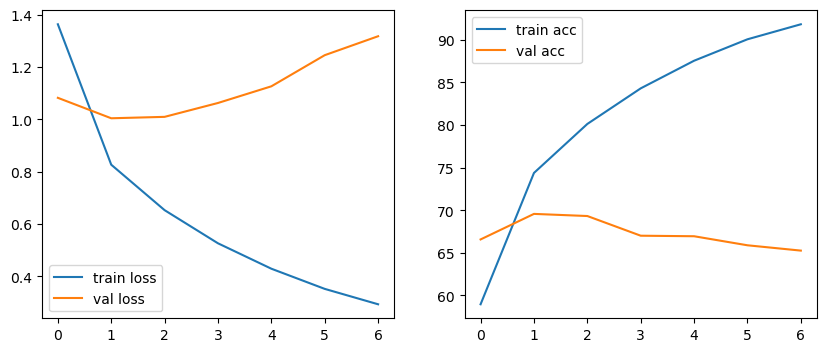

In [22]:
# your code
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(train_losses,  label="train loss"); 
ax[0].plot(validation_losses,  label="val loss"); 
ax[0].legend();

ax[1].plot(train_accs,  label="train acc");
ax[1].plot(validation_accs,  label="val acc"); 
ax[1].legend();

---

### Making Predications

When you are done training your model, simply run the following code. It will save your model as a file named __model.pt__.  Send it to me to test it on the test data,

In [23]:
# DO NOT CHANGE
img, _ = next(iter(val_loader))
img = img.to(device)

with torch.no_grad():
    model_trace = torch.jit.trace(model, (img))
    
torch.jit.save(model_trace,"model.pt")

---